# Predicting Apple Stock Prices

## Introduction to Problem & Data


### Problem Statement
Apple Inc., as one of the most valuable companies globally, is closely monitored by investors and analysts alike. Accurately predicting its stock prices can provide key insights into market behavior and assist in making informed financial decisions. For this project, the focus is on developing a robust time series predictive model to forecast Apple’s daily closing stock prices. By analyzing historical trends from 2014 to 2023, the project seeks to identify patterns, seasonality, and key factors influencing price movements.This project will compare the performance of models like ARIMA, Prophet, and Long Short-Term Memory (LSTM), alongside simpler methods like Exponential Smoothing and Naive Forecaster. By evaluating these models with metrics such as mean squared error (MSE) and mean absolute error (MAE), the project aims to determine the best-performing approach for forecasting stock prices and generating actionable insights. This model may be useful for individual investors and financial institutions aiming to make informed investment decisions and optimize their portfolios. These predictions can help traders identify potential opportunities for buying or selling Apple stocks, ultimately maximizing their returns while mitigating risks. By leveraging key financial indicators and advanced forecasting methods, the model will not only improve predictive capabilities for stock prices but can also assist stakeholders in the financial industry with actionable insights.

### Dataset Description

The data for this project is sourced from Kaggle in CSV format, providing comprehensive daily stock price information for Apple Inc. from January 2014 to December 2023. This dataset includes key financial metrics as well as derived technical indicators commonly used in stock analysis. While the dataset is rich in features, some preprocessing will be necessary to handle missing values, remove unnecessary columns, and prepare the data for time series modeling.

Challenges in constructing an accurate predictive model may arise due to the inherent volatility of financial markets and the noise in stock price movements. However, I believe that with appropriate modeling techniques and the inclusion of technical indicators, it is possible to capture temporal patterns and achieve reasonable accuracy in forecasting.

The dataset comprises 2,516 rows, with each row representing a trading day. It includes key attributes such as:
Core Metrics: Daily open, high, low, and close prices, as well as trading volume.
Technical Indicators: Features like RSI (Relative Strength Index), CCI (Commodity Channel Index), SMA (Simple Moving Average), EMA (Exponential Moving Average), MACD (Moving Average Convergence Divergence), Bollinger Bands, ATR (Average True Range), and True Range.

These features will be used to train and evaluate models for predicting Apple’s future closing prices and analyzing price trends.

### Data Pre-Processing & Preliminary Examination:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('aapl.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,19.282236,19.265060,18.372604,18.484713,0.194637,19.979268,0.321428,0.305722,0.316301,bearish
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,19.297314,19.267243,18.398896,18.501371,0.132887,19.936375,0.473929,0.329752,0.327561,bullish
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,19.310864,19.273472,18.418311,18.519794,0.091398,19.893571,0.471428,0.349991,0.337837,bearish
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,19.316671,19.274008,18.433146,18.535080,0.046768,19.857893,0.287141,0.341013,0.334216,bullish
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,19.329171,19.279313,18.449414,18.552493,0.021012,19.816875,0.245355,0.327347,0.327868,bearish


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2516 non-null   object 
 1   open       2516 non-null   float64
 2   high       2516 non-null   float64
 3   low        2516 non-null   float64
 4   close      2516 non-null   float64
 5   volume     2516 non-null   int64  
 6   rsi_7      2516 non-null   float64
 7   rsi_14     2516 non-null   float64
 8   cci_7      2516 non-null   float64
 9   cci_14     2516 non-null   float64
 10  sma_50     2516 non-null   float64
 11  ema_50     2516 non-null   float64
 12  sma_100    2516 non-null   float64
 13  ema_100    2516 non-null   float64
 14  macd       2516 non-null   float64
 15  bollinger  2516 non-null   float64
 16  TrueRange  2516 non-null   float64
 17  atr_7      2516 non-null   float64
 18  atr_14     2516 non-null   float64
 19  target     2516 non-null   object 
dtypes: float

In [ ]:
df.describe()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,77.856671,78.704468,77.060193,77.920721,1.366662e+08,55.829312,55.519634,18.095222,25.615576,76.247802,76.268259,74.643895,74.650532,0.477411,77.261412,1.819842,1.814850,1.808171
std,56.171865,56.808974,55.581734,56.226768,8.403551e+07,17.720405,12.917822,99.975348,108.636294,55.164687,55.126114,54.292014,54.142049,1.820108,55.795529,1.829370,1.557822,1.520721
min,17.684999,17.911785,17.626785,17.849285,2.404830e+07,7.771611,21.024935,-233.333333,-359.820078,18.865621,18.936409,18.372604,18.484713,-6.673117,18.645339,0.115000,0.208006,0.241328
25%,29.740001,29.976250,29.554375,29.803750,8.138358e+07,42.223776,45.982864,-67.510511,-62.798902,29.016362,29.150426,29.313956,29.263913,-0.208277,29.462344,0.481874,0.558372,0.571540
50%,47.963749,48.534999,47.743749,48.107500,1.121606e+08,56.567948,55.840878,35.924386,45.301983,48.321325,47.546591,46.741750,46.984332,0.344944,47.652813,1.025000,1.012167,1.020535
75%,134.792496,135.995002,133.325004,134.562497,1.668892e+08,70.072551,64.891153,99.248997,108.764720,131.678000,131.059003,129.198700,128.011330,1.180283,133.377500,2.732506,3.002147,3.021852
max,198.020004,199.619995,197.000000,198.110001,1.065523e+09,94.046150,90.402170,233.333333,368.904964,187.442600,188.942738,182.538301,184.681801,7.511570,194.308501,12.809998,7.034749,5.984262


## Exploratory Data Analysis (EDA)

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

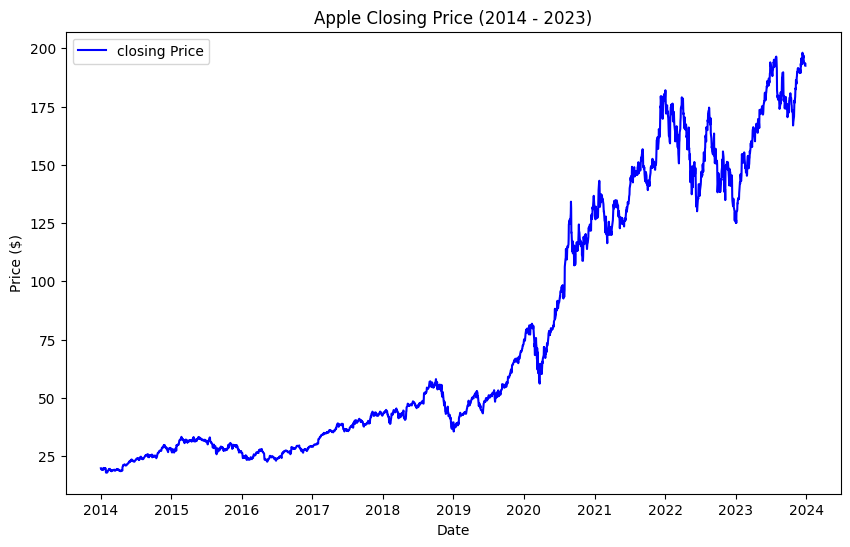

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='closing Price', color='blue')
plt.title('Apple Closing Price (2014 - 2023)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

This graph shows the steady upward trend in Apple’s closing stock price from 2014 to 2023, with notable spikes and dips, particularly around 2020, reflecting periods of increased volatility potentially linked to market events. Overall, the long-term trend indicates significant growth in value over this period.

In [ ]:
print(df[['close', 'volume']].describe())

             close        volume
count  2516.000000  2.516000e+03
mean     77.920721  1.366662e+08
std      56.226768  8.403551e+07
min      17.849285  2.404830e+07
25%      29.803750  8.138358e+07
50%      48.107500  1.121606e+08
75%     134.562497  1.668892e+08
max     198.110001  1.065523e+09


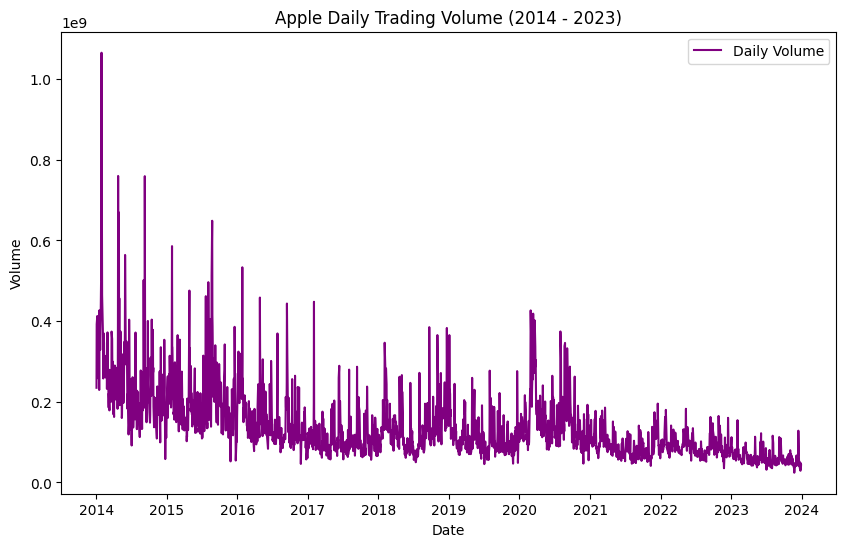

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['volume'], label='Daily Volume', color='purple')
plt.title('Apple Daily Trading Volume (2014 - 2023)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

This graph shows Apple’s daily trading volume from 2014 to 2023, with a clear decline in volume over time. The early years exhibit significant spikes, suggesting periods of high trading activity, while recent years indicate lower and steadier trading volumes, potentially reflecting changing investor behaviors or market dynamics.

In [ ]:
df['close_Lag_1'] = df['close'].shift(1)
df['close_Lag_2'] = df['close'].shift(2)

In [ ]:
df['SMA_20'] = df['close'].rolling(window=20).mean()  # 20-day moving average
df['SMA_50'] = df['close'].rolling(window=50).mean()  # 50-day moving average

In [ ]:
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter

In [ ]:
df.dropna(inplace=True)

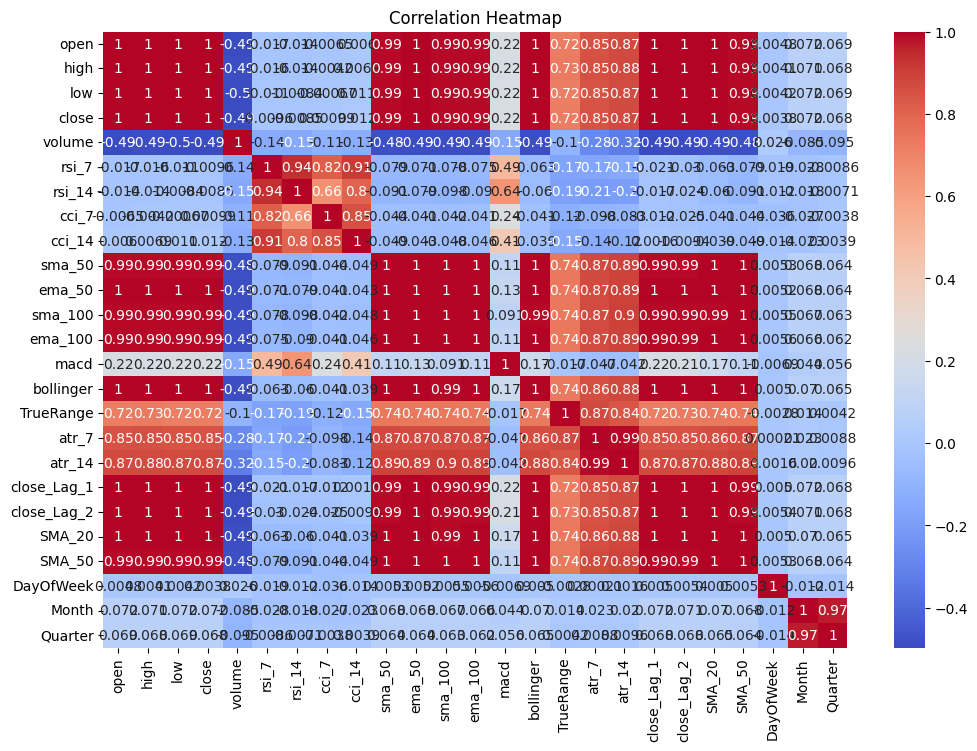

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows strong positive correlations among features derived from the closing price, such as moving averages (SMA_20, SMA_50, close_Lag_1), reflecting their dependence on the underlying price. Volume exhibits a weaker correlation with closing price-related features, indicating it may provide additional, less redundant information.

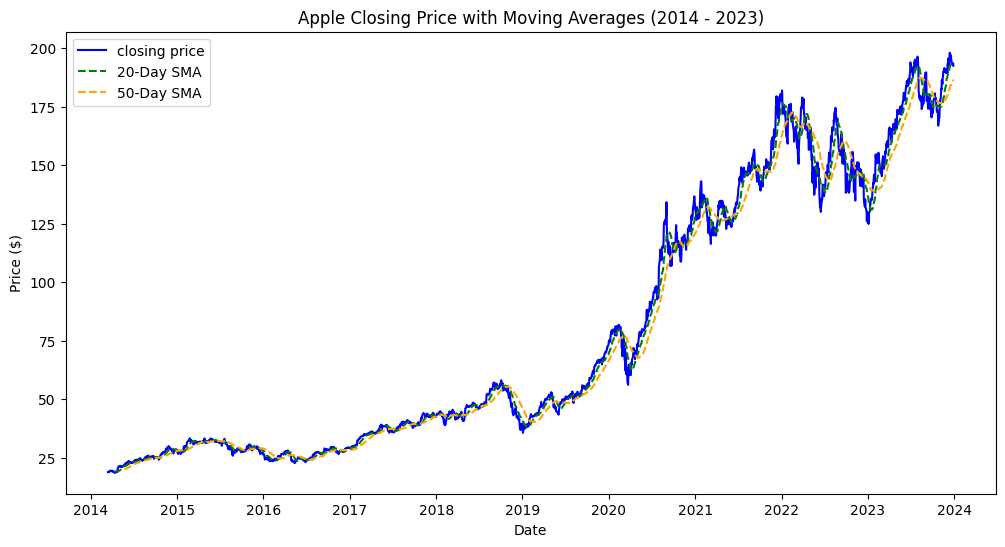

In [ ]:
df['SMA_20'] = df['close'].rolling(window=20).mean()
df['SMA_50'] = df['close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='closing price', color='blue')
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', color='green', linestyle='--')
plt.plot(df.index, df['SMA_50'], label='50-Day SMA', color='orange', linestyle='--')
plt.title('Apple Closing Price with Moving Averages (2014 - 2023)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

This graph illustrates Apple's closing price alongside 20-day and 50-day simple moving averages (SMAs) from 2014 to 2023. The SMAs smooth out short-term fluctuations, with the 20-day SMA closely tracking the closing price, while the 50-day SMA provides a broader view of trends. The alignment of these averages with the closing price highlights trends and potential reversal points in Apple’s stock performance.

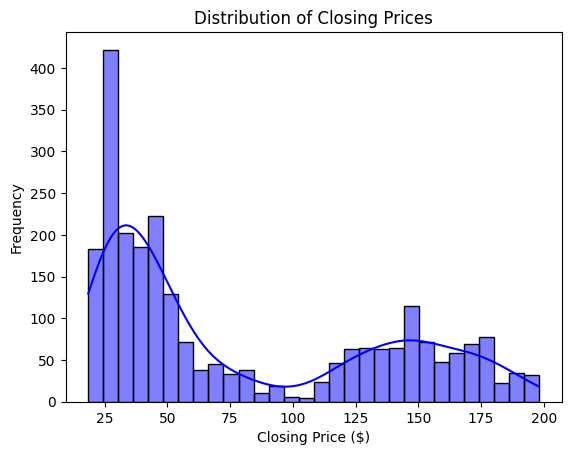

In [ ]:
sns.histplot(df['close'], kde=True, bins=30, color='blue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price ($)')
plt.ylabel('Frequency')
plt.show()


This histogram shows a bimodal distribution of Apple's closing prices from 2014 to 2023, with a significant concentration in the 20-50 dollar range and another peak around $150. The distribution reflects the stock's growth over time, transitioning from lower price levels in earlier years to higher levels in recent years.

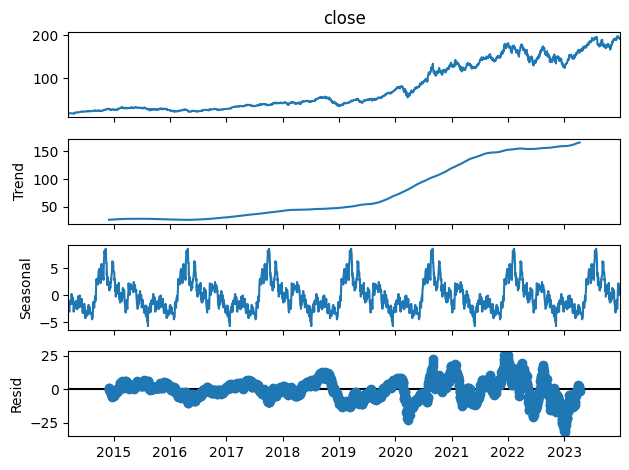

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['close'], model='additive', period=365)  # Assuming daily data
decomposition.plot()
plt.show()

This decomposition of Apple's closing price time series reveals a strong upward trend, capturing the overall growth in stock price from 2014 to 2023. The seasonal component shows recurring patterns likely influenced by periodic market behaviors, while the residual component highlights irregular fluctuations and noise, indicating potential short-term volatility not explained by trend or seasonality.

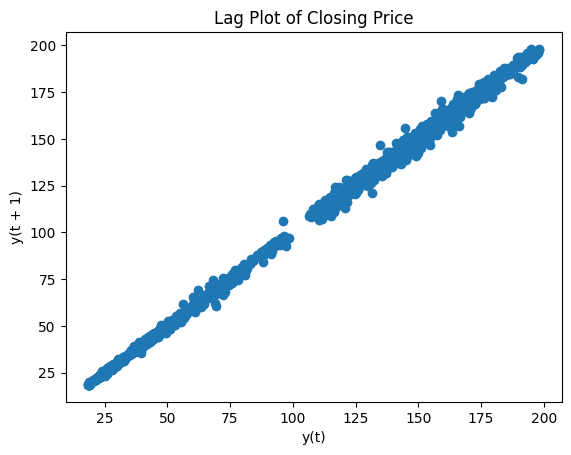

In [ ]:
pd.plotting.lag_plot(df['close'])
plt.title('Lag Plot of Closing Price')
plt.show()

This lag plot of Apple's closing price shows a strong linear relationship between successive days' prices, indicating high autocorrelation. This suggests that the stock's closing price on a given day is strongly dependent on its price from the previous day, a key characteristic of time series data.